In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numbers

### Helper Functions

In [ ]:
#function to calculate norm

from numpy import linalg as LA

def norm(df):
  data_oureka_norm=np.array([LA.norm(i,2) for i in df.values])
  return data_oureka_norm

In [ ]:
#function to calculate norm

from numpy import linalg as LA

def norm(df):
  norm=np.array([np.sqrt(sum([i[0]**2,i[1]**2,i[2]**2])) for i in df.values])
  return norm

In [ ]:
#gaussian filter to remove the noise

from scipy.ndimage import gaussian_filter1d

def denoise(df,sd):
  denoised = gaussian_filter1d(df, sd)
  return denoised

In [ ]:
#function to calculate average

def Average(lst):
    return sum(lst) / len(lst)

In [ ]:
#area under the curve

def auc(df):
  return np.trapz(abs(df))

#Static data analysis

## Trial_1 CONFIGURATION


IMU SAMPLING RATE 201<br>
ACCELEROMETER FULL SCALE CONFIGURATION: 1 (2G)<br>
GYROSCOPE FULL SCALE CONFIGURATION: 2 (500 degrees per second (dps)<br>

SENSOR MODE: STATIC<br>
TRIAL: 1<br>
TIME RECORDED: ~1 minute and 50 seconds. <br>

Static samples taken in to consideration: 20k datapoints, indices (5000-15000)


In [ ]:
pd.set_option('display.max_rows', 50)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


#### Data Import

In [ ]:
data_oureka_dynamic_1 = pd.read_csv('/content/gdrive/MyDrive/test_01.txt',sep='\t',header=0, on_bad_lines='skip')
# data_oureka_dynam?ic_rot = pd.read_csv('/content/gdrive/MyDrive/50htz/50htzrot.txt',sep='\t',header=0, on_bad_lines='skip')

In [ ]:
data_oureka_dynamic_2 = pd.read_csv('/content/gdrive/MyDrive/test_02.txt',sep='\t',header=0, on_bad_lines='skip')


In [ ]:
data_shimmer_dynamic_1 = pd.read_csv('/content/gdrive/MyDrive/test_01shimmer.csv',sep='\t',header=1)

In [ ]:
data_shimmer_dynamic_2 = pd.read_csv('/content/gdrive/MyDrive/test_02_shimmer.csv',sep='\t',header=1)

In [ ]:
data_shimmer_dynamic_3 = pd.read_csv('/content/gdrive/MyDrive/test_06_shimmer.csv',sep='\t',header=1)
data_oureka_dynamic_3 = pd.read_csv('/content/gdrive/MyDrive/test_06.txt',sep='\t',header=0, on_bad_lines='skip')


In [ ]:
data_oureka_dynamic_3

,date,time,Accl_X,Accl_Y,Accl_Z,Gyro_X,Gyro_Y,Gyro_Z,Mag_X,Mag_Y,Mag_Z
0,27.02.23,09:57:39:864,0.024414,-0.004883,-1.001465,-0.305343,-0.061069,-0.320611,-19.050001,-18.6,47.100002
1,27.02.23,09:57:39:873,0.021973,-0.006348,-1.008789,0.030534,0.106870,0.091603,-19.050001,-18.6,47.100002
2,27.02.23,09:57:39:885,0.021973,-0.006348,-1.008789,-0.244275,-0.167939,0.091603,-19.050001,-18.6,47.100002
3,27.02.23,09:57:39:906,0.023926,0.000000,-1.006348,-0.824427,0.290076,-0.152672,-19.050001,-18.6,47.100002
4,27.02.23,09:57:39:927,0.029297,-0.001465,-1.006836,-0.351145,0.167939,0.091603,-19.050001,-18.6,47.100002
...,...,...,...,...,...,...,...,...,...,...,...
2065,27.02.23,09:58:19:507,0.029785,-0.008789,-1.001465,0.000000,0.015267,0.198473,-19.050001,-18.6,47.100002
2066,27.02.23,09:58:19:528,0.029785,-0.011230,-1.006348,-0.091603,0.030534,0.045802,-19.050001,-18.6,47.100002
2067,27.02.23,09:58:19:549,0.018555,0.005371,-1.006836,-0.091603,-0.152672,-0.137405,-19.050001,-18.6,47.100002
2068,27.02.23,09:58:19:564,0.018555,0.005371,-1.006836,-0.702290,0.549618,0.091603,-19.050001,-18.6,47.100002


In [ ]:
data_shimmer_dynamic_1 = data_shimmer_dynamic_1[1390:]
data_oureka_dynamic_1 = data_oureka_dynamic_1[930:]

In [ ]:
data_shimmer_dynamic_2 = data_shimmer_dynamic_2[500:]
data_oureka_dynamic_2 = data_oureka_dynamic_2[200:]

In [ ]:
data_shimmer_dynamic_3 = data_shimmer_dynamic_3[1047:1908]
data_oureka_dynamic_3 = data_oureka_dynamic_3[312:1167]

In [ ]:
for cols in data_shimmer_dynamic_1.iloc[1:,1:11].columns:
  data_shimmer_dynamic_1[cols][1:] = data_shimmer_dynamic_1[cols][1:].astype(float)

<ipython-input-20-d80fdedf3765>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_shimmer_dynamic_1[cols][1:] = data_shimmer_dynamic_1[cols][1:].astype(float)
/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._set_values(indexer, value)


In [ ]:
for cols in data_shimmer_dynamic_2.iloc[1:,1:11].columns:
  data_shimmer_dynamic_2[cols][1:] = data_shimmer_dynamic_2[cols][1:].astype(float)

In [ ]:
for cols in data_shimmer_dynamic_3.iloc[1:,1:13].columns:
  data_shimmer_dynamic_3[cols][1:] = data_shimmer_dynamic_3[cols][1:].astype(float)

In [ ]:
data_shimmer_dynamic_1.reset_index(inplace=True,drop=True)

In [ ]:
data_oureka_dynamic_1.reset_index(inplace=True,drop=True)

In [ ]:
data_shimmer_dynamic_2.reset_index(inplace=True,drop=True)
data_oureka_dynamic_2.reset_index(inplace=True,drop=True)

In [ ]:
data_shimmer_dynamic_3.reset_index(inplace=True,drop=True)
data_oureka_dynamic_3.reset_index(inplace=True,drop=True)

#### Oureka sensor accelerometer data convertion from g to (meter/second/second)

In [ ]:
#converting the oureka data in g to meter per second squared since the data from shimmer is metre/seconds squared.

def accg2accms2(df):
  df['Accl_X'] = df['Accl_X'] * 9.80665
  df['Accl_Y'] = df['Accl_Y'] * 9.80665
  df['Accl_Z'] = df['Accl_Z'] * 9.80665

In [ ]:
accg2accms2(data_oureka_dynamic_1)
accg2accms2(data_oureka_dynamic_2)

In [ ]:
accg2accms2(data_oureka_dynamic_3)

<ipython-input-27-15b9c8afa78f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Accl_X'] = df['Accl_X'] * 9.80665
<ipython-input-27-15b9c8afa78f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Accl_Y'] = df['Accl_Y'] * 9.80665
<ipython-input-27-15b9c8afa78f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [ ]:
# plt.plot(data_shimmer_dynamic_2['Shimmer_DCA4_Accel_LN_X_CAL'][1:])

In [ ]:
# plt.plot(data_oureka_dynamic_2['Accl_X'])

In [ ]:
# plt.plot(data_oureka_dynamic_2['Accl_Y'])

In [ ]:
# plt.plot(data_shimmer_dynamic_2['Shimmer_DCA4_Accel_LN_Y_CAL'][1:]) #[1398:1500]

In [ ]:
# plt.plot(data_shimmer_dynamic_2['Shimmer_DCA4_Accel_LN_Z_CAL'][1:])

In [ ]:
# plt.plot(data_oureka_dynamic_2['Accl_Z'][:2500])

#### Type conversion of shimmer sensor data to float

In [ ]:
norm_shimmer_dynamic_1 = norm(data_shimmer_dynamic_1.iloc[1:800,4:7])
norm_oureka_dynamic_1 = norm(data_oureka_dynamic_1.iloc[:,2:5])
# norm_data_oureka_dynamic_rot = norm(data_oureka_dynamic_rot.iloc[1:,2:5])

In [ ]:
norm_shimmer_dynamic_2= norm(data_shimmer_dynamic_2.iloc[1:,1:4])
norm_oureka_dynamic_2= norm(data_oureka_dynamic_2.iloc[:2470,2:5])
# norm_data_oureka_dynamic_rot = norm(data_oureka_dynamic_rot.iloc[1:,2:5])

In [ ]:
norm_shimmer_dynamic_3= norm(data_shimmer_dynamic_3.iloc[1:,1:4])
norm_oureka_dynamic_3= norm(data_oureka_dynamic_3.iloc[1:,2:5])
# norm_data_oureka_dynamic_rot = norm(data_oureka_dynamic_rot.iloc[1:,2:5])

In [ ]:
norm_shimmer_dynamic_3_mag= norm(data_shimmer_dynamic_3.iloc[1:,10:13])
norm_oureka_dynamic_3_mag= norm(data_oureka_dynamic_3.iloc[1:,8:11])
# norm_data_oureka_dynamic_rot = norm(data_oureka_dynamic_rot.iloc[1:,2:5])

In [ ]:
norm_shimmer_dynamic_3_gyro= norm(data_shimmer_dynamic_3.iloc[1:,7:10])
norm_oureka_dynamic_3_gyro= norm(data_oureka_dynamic_3.iloc[:,5:8])
# norm_data_oureka_dynamic_rot = norm(data_oureka_dynamic_rot.iloc[1:,2:5])

In [ ]:
#There are some empty rows in the excel file, if i remove those values, the spacing between alters and the whole data gets changed. So I am removing the nan values here, I looked up at the nan values, it occurs every 41 times, its the interval of an empty line (as there is the time stamp)
norm_oureka_dynamic_1 = norm_oureka_dynamic_1[np.logical_not(np.isnan(norm_oureka_dynamic_1))]

In [ ]:
#There are some empty rows in the excel file, if i remove those values, the spacing between alters and the whole data gets changed. So I am removing the nan values here, I looked up at the nan values, it occurs every 41 times, its the interval of an empty line (as there is the time stamp)
norm_oureka_dynamic_2 = norm_oureka_dynamic_2[np.logical_not(np.isnan(norm_oureka_dynamic_2))]

In [ ]:
#There are some empty rows in the excel file, if i remove those values, the spacing between alters and the whole data gets changed. So I am removing the nan values here, I looked up at the nan values, it occurs every 41 times, its the interval of an empty line (as there is the time stamp)
norm_oureka_dynamic_3 = norm_oureka_dynamic_3[np.logical_not(np.isnan(norm_oureka_dynamic_3))]

In [ ]:
norm_oureka_dynamic_3_gyro= norm_oureka_dynamic_3_gyro[np.logical_not(np.isnan(norm_oureka_dynamic_3_gyro))]


In [ ]:
norm_oureka_dynamic_3_mag= norm_oureka_dynamic_3_mag[np.logical_not(np.isnan(norm_oureka_dynamic_3_mag))]


#### plots of the magnitude values of shimmer and oureka sensor

Text(0, 0.5, 'Acceleration(m/s^2)')

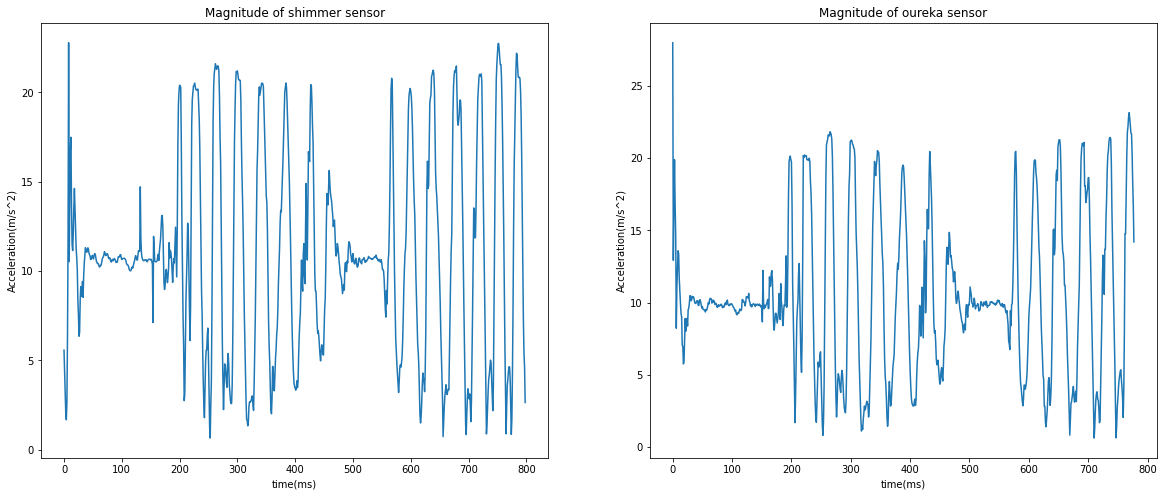

In [ ]:
# plt.plot(norm_shimmer_dynamic_1[2000:6000], 'k', label='denoised data')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
ax1.set_title('Magnitude of shimmer sensor')

ax1.plot(norm_shimmer_dynamic_1)
ax2.set_title('Magnitude of oureka sensor')

ax2.plot(norm_oureka_dynamic_1)

ax1.set_xlabel('time(ms)')
ax1.set_ylabel('Acceleration(m/s^2)')
ax2.set_xlabel('time(ms)')
ax2.set_ylabel('Acceleration(m/s^2)')

Text(0, 0.5, 'Acceleration(m/s^2)')

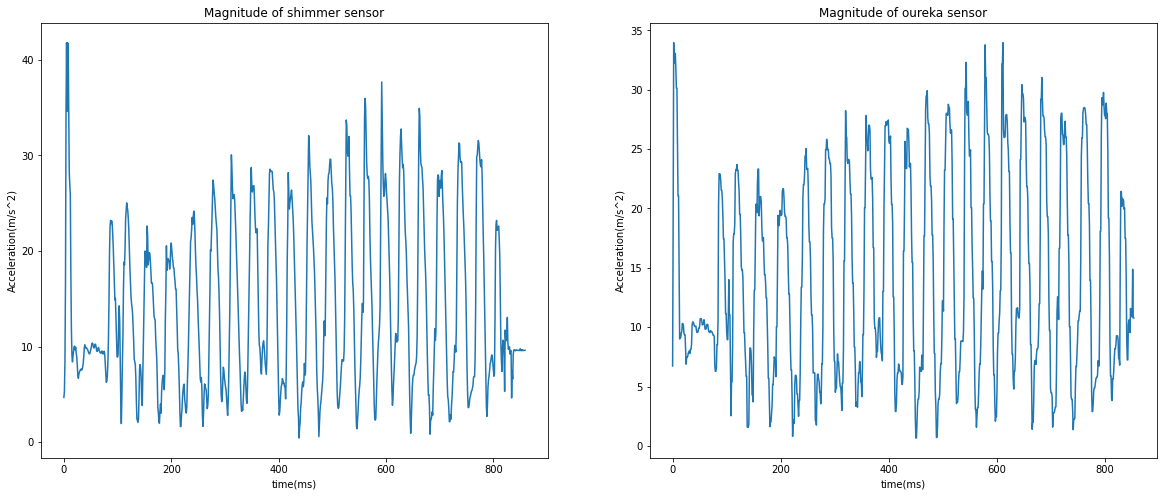

In [ ]:
# plt.plot(norm_shimmer_dynamic_1[2000:6000], 'k', label='denoised data')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
ax1.set_title('Magnitude of shimmer sensor')

ax1.plot(norm_shimmer_dynamic_3)
ax2.set_title('Magnitude of oureka sensor')
8
ax2.plot(norm_oureka_dynamic_3)

ax1.set_xlabel('time(ms)')
ax1.set_ylabel('Acceleration(m/s^2)')
ax2.set_xlabel('time(ms)')
ax2.set_ylabel('Acceleration(m/s^2)')

Text(0, 0.5, 'Acceleration(m/s^2)')

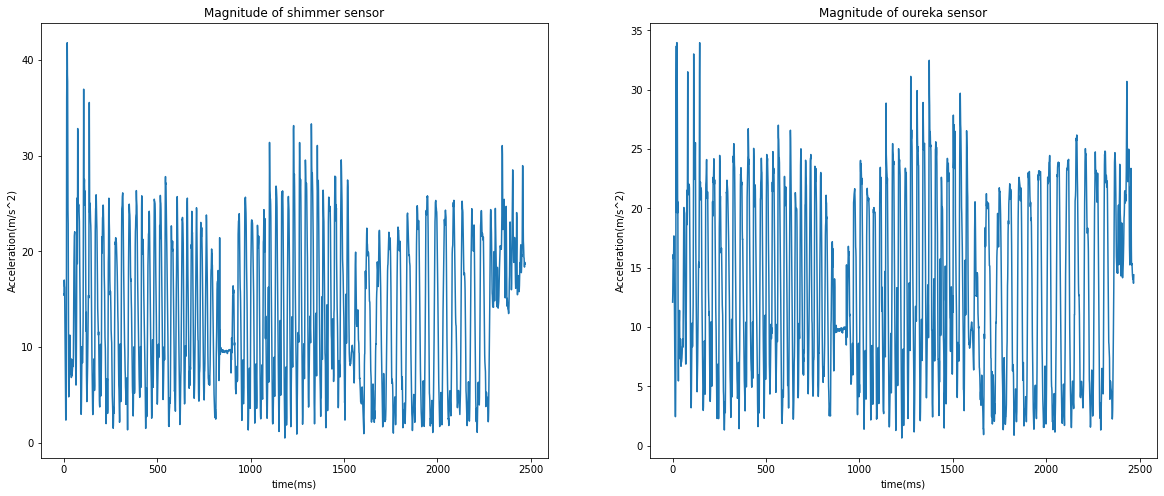

In [ ]:
# plt.plot(norm_shimmer_dynamic_1[2000:6000], 'k', label='denoised data')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
ax1.set_title('Magnitude of shimmer sensor')

ax1.plot(norm_shimmer_dynamic_2)
ax2.set_title('Magnitude of oureka sensor')

ax2.plot(norm_oureka_dynamic_2)

ax1.set_xlabel('time(ms)')
ax1.set_ylabel('Acceleration(m/s^2)')
ax2.set_xlabel('time(ms)')
ax2.set_ylabel('Acceleration(m/s^2)')

#### Removing the mean value from the magnitude

In [ ]:
gravity_less_norm_shimmer_dynamic_1 = norm_shimmer_dynamic_1 - np.mean(norm_shimmer_dynamic_1)

In [ ]:
gravity_less_norm_oureka_dynamic_1 = norm_oureka_dynamic_1 - np.mean(norm_oureka_dynamic_1)

In [ ]:
gravity_less_norm_shimmer_dynamic_2 = norm_shimmer_dynamic_2 - np.mean(norm_shimmer_dynamic_2)
gravity_less_norm_oureka_dynamic_2 = norm_oureka_dynamic_2 - np.mean(norm_oureka_dynamic_2)

In [ ]:
gravity_less_norm_shimmer_dynamic_3 = norm_shimmer_dynamic_3 - np.mean(norm_shimmer_dynamic_3)
gravity_less_norm_oureka_dynamic_3 = norm_oureka_dynamic_3 - np.mean(norm_oureka_dynamic_3)

<ipython-input-53-ec1a3e25f5a5>:1: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label


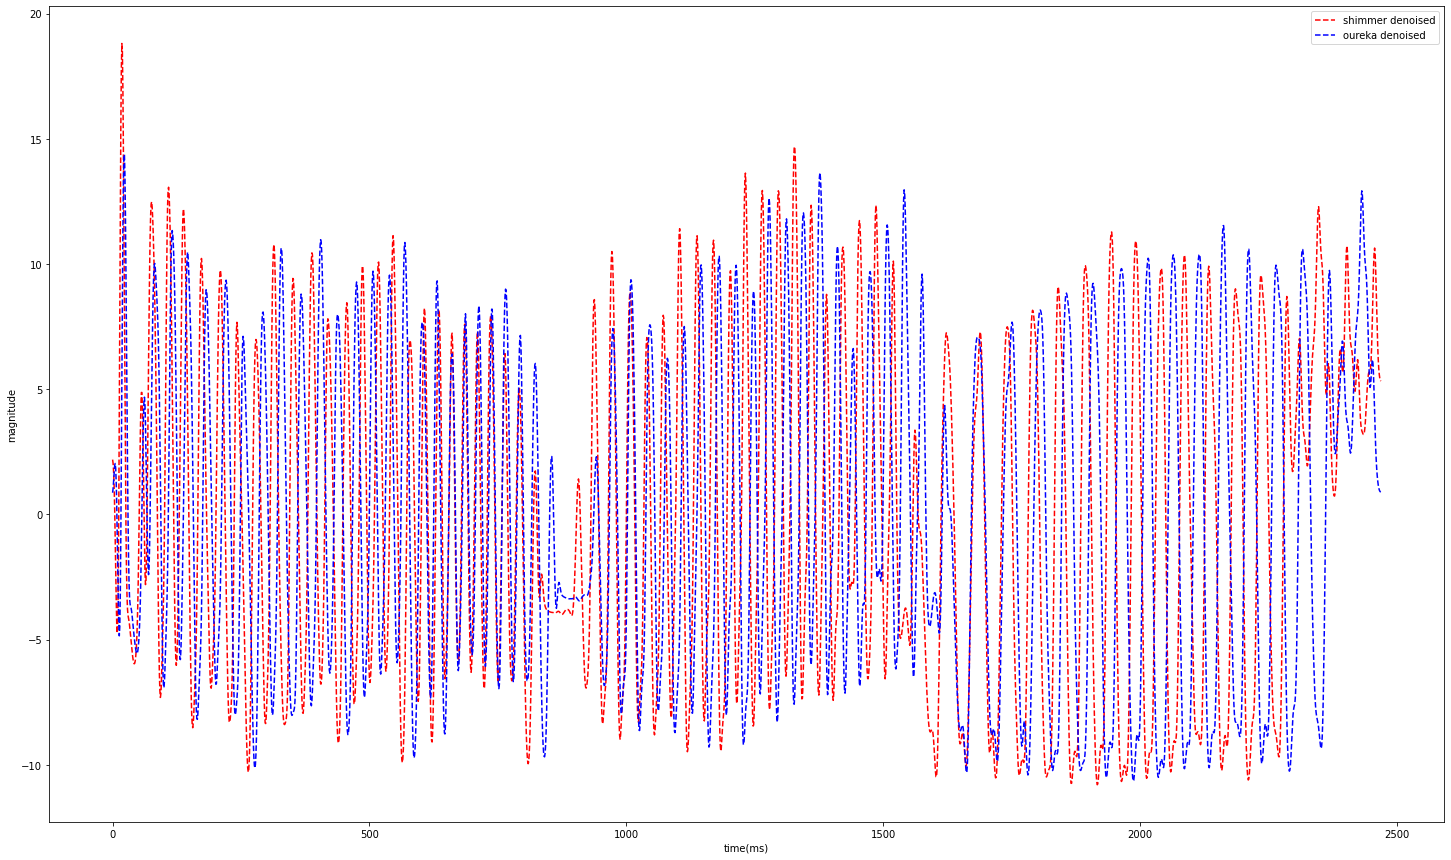

In [ ]:
from scipy.ndimage.measurements import label
# plot of the denoised data of the shimmer and oureka
denoised_shimmer = denoise(gravity_less_norm_shimmer_dynamic_2, 3)
denoised_oureka = denoise(gravity_less_norm_oureka_dynamic_2, 3)
plt.figure(figsize=(25,15))

plt.plot(denoised_shimmer, 'r', linestyle='dashed',label='shimmer denoised') #black
plt.plot(denoised_oureka,'b', linestyle='dashed',label='oureka denoised') #blue


# ax1.set_xlabel('time(ms)')
# ax1.set_ylabel('Acceleration(m/s^2)')
plt.xlabel('time(ms)')
plt.ylabel('magnitude')
plt.legend()

<ipython-input-54-177c3615aa3e>:1: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label


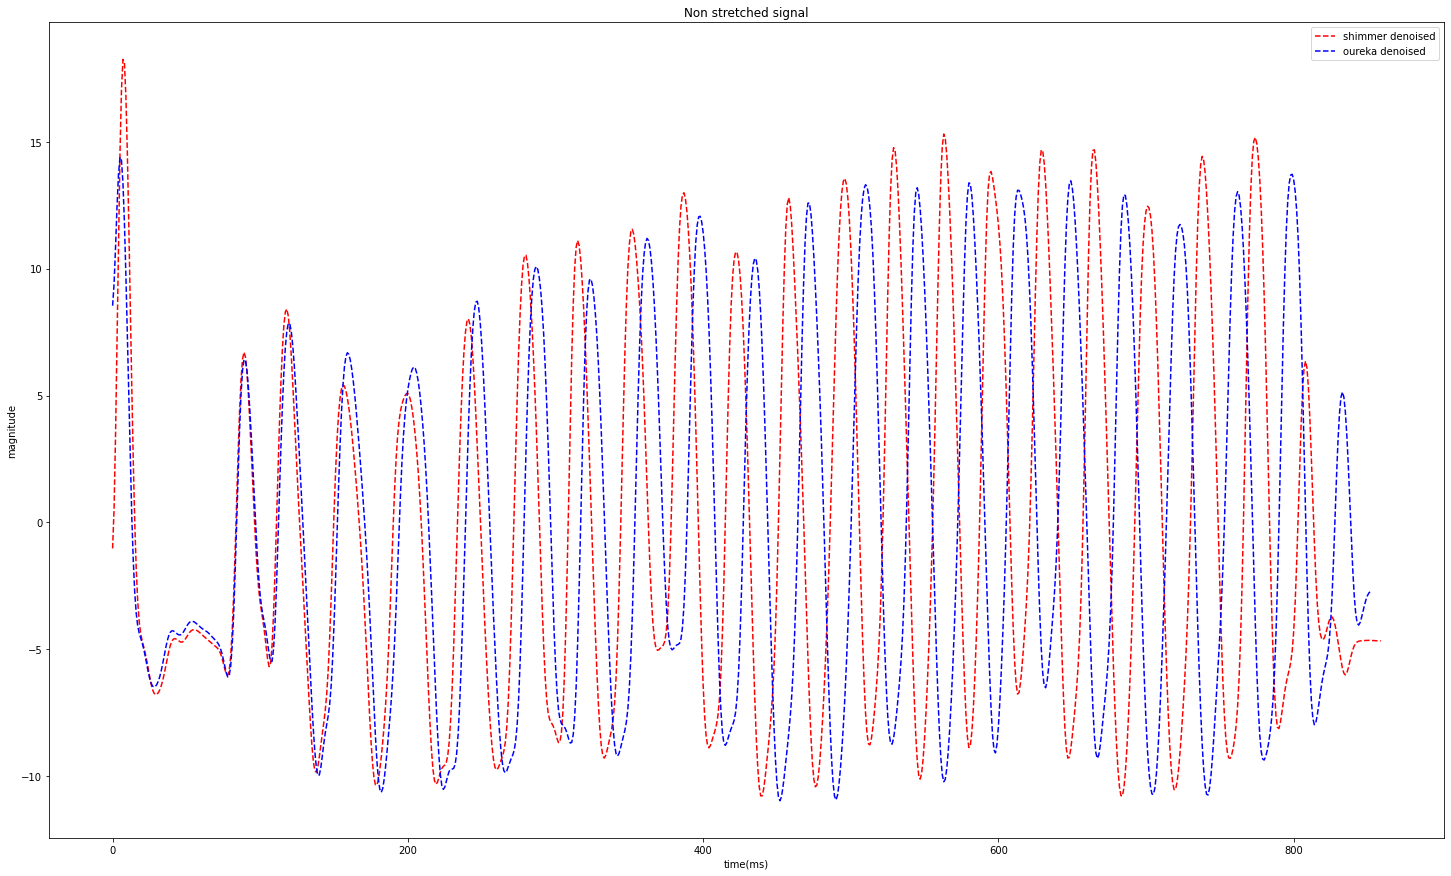

In [ ]:
from scipy.ndimage.measurements import label
# plot of the denoised data of the shimmer and oureka
denoised_shimmer_3 = denoise(gravity_less_norm_shimmer_dynamic_3, 3)
denoised_oureka_3 = denoise(gravity_less_norm_oureka_dynamic_3, 3)
plt.figure(figsize=(25,15))

plt.plot(denoised_shimmer_3, 'r', linestyle='dashed',label='shimmer denoised') #black
plt.plot(denoised_oureka_3,'b', linestyle='dashed',label='oureka denoised') #blue


# ax1.set_xlabel('time(ms)')
# ax1.set_ylabel('Acceleration(m/s^2)')
plt.xlabel('time(ms)')
plt.ylabel('magnitude')
plt.title('Non stretched signal')
plt.legend()

<ipython-input-55-ac7ef733eb2b>:1: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label


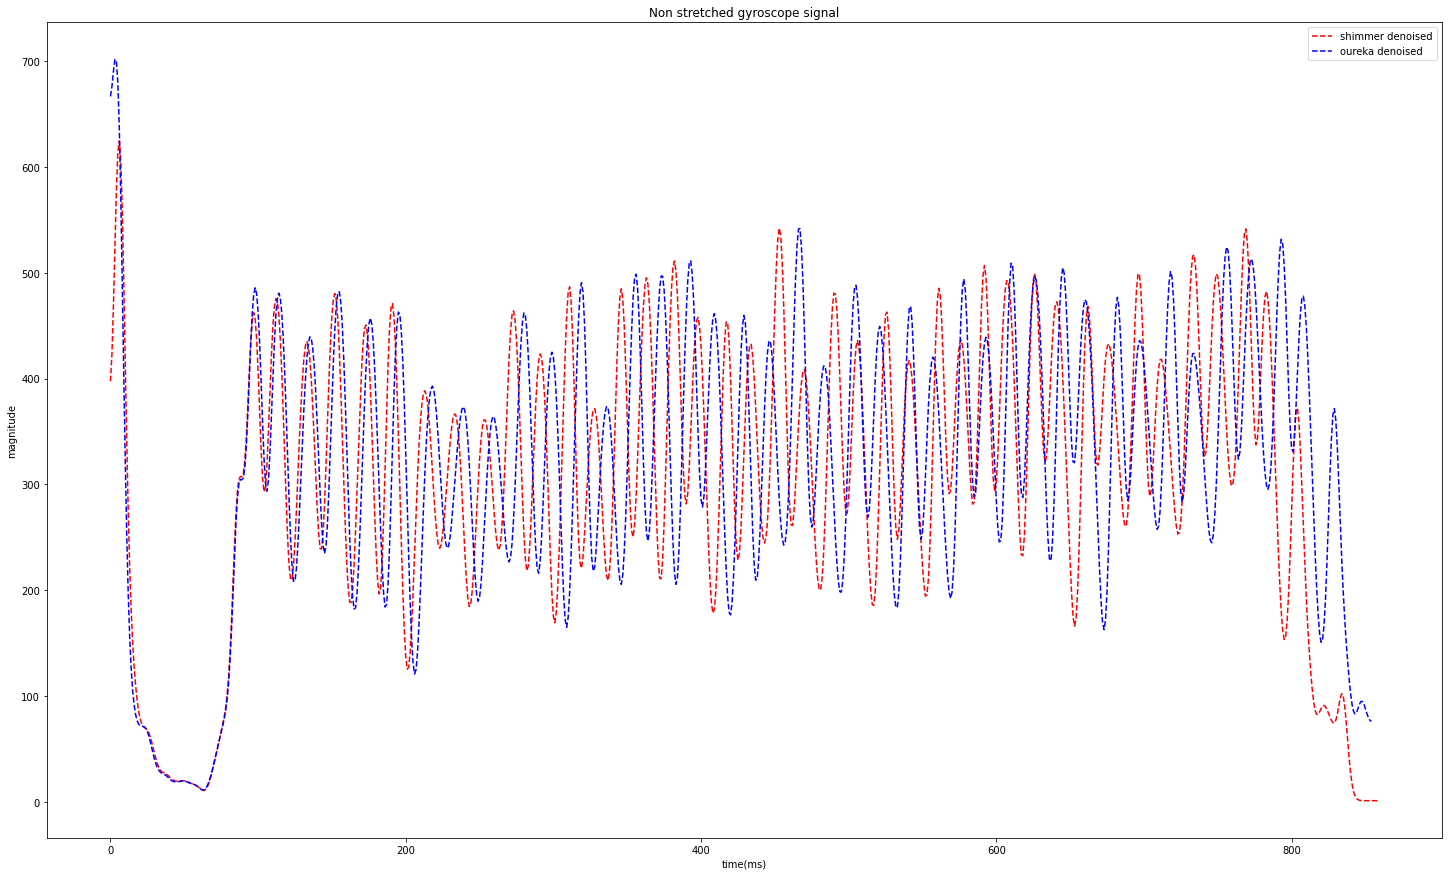

In [ ]:

from scipy.ndimage.measurements import label
# plot of the denoised data of the shimmer and oureka
denoised_shimmer_3_gyro = denoise(norm_shimmer_dynamic_3_gyro, 3)
denoised_oureka_3_gyro = denoise(norm_oureka_dynamic_3_gyro, 3)
plt.figure(figsize=(25,15))

plt.plot(denoised_shimmer_3_gyro, 'r', linestyle='dashed',label='shimmer denoised') #black
plt.plot(denoised_oureka_3_gyro,'b', linestyle='dashed',label='oureka denoised') #blue


# ax1.set_xlabel('time(ms)')
# ax1.set_ylabel('Acceleration(m/s^2)')
plt.xlabel('time(ms)')
plt.ylabel('magnitude')
plt.title('Non stretched gyroscope signal')
plt.legend()

<ipython-input-56-0db97ab99b09>:1: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label


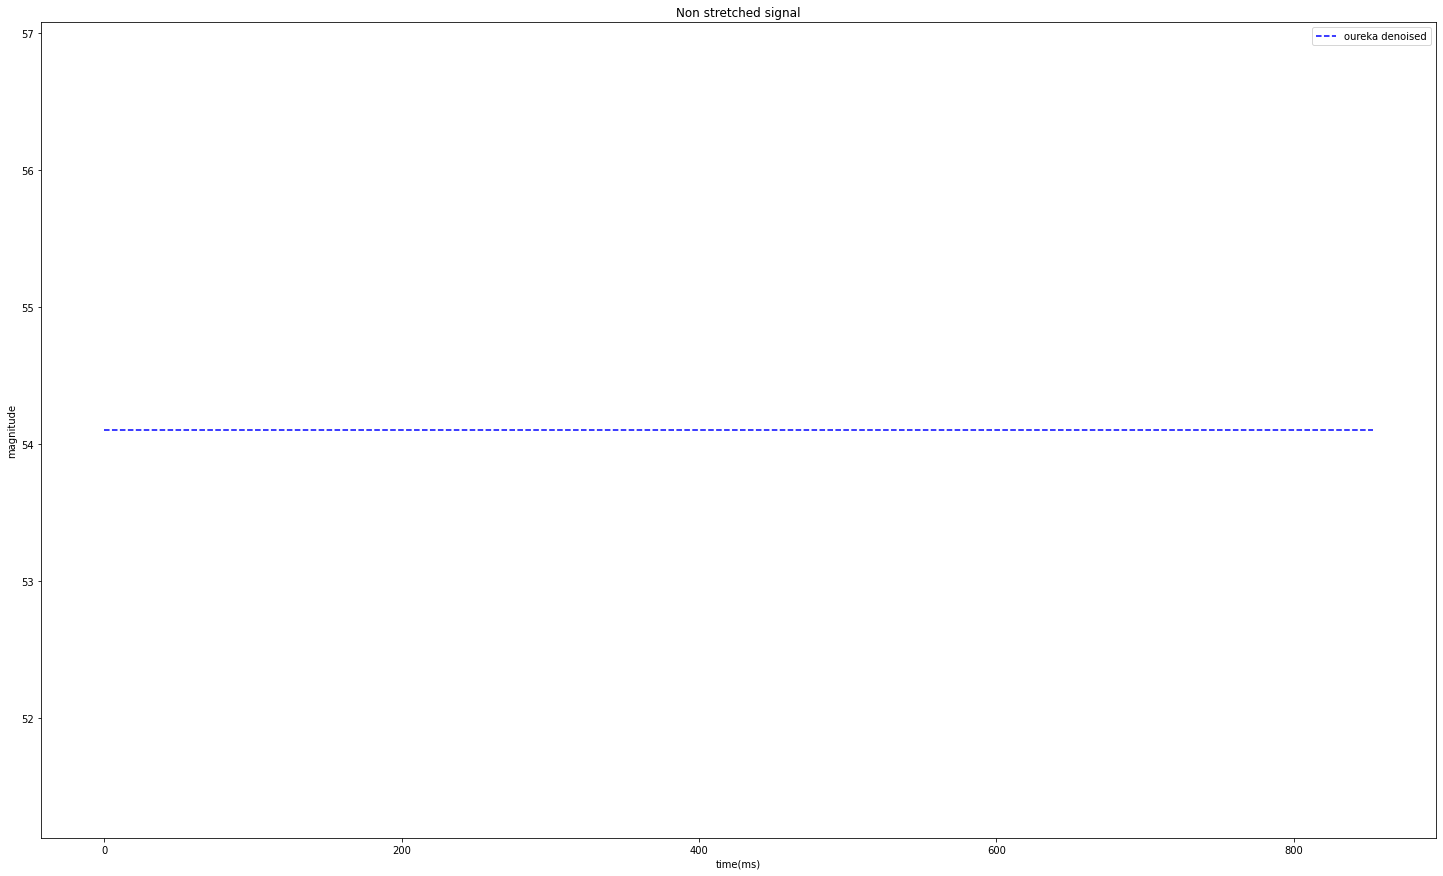

In [ ]:
from scipy.ndimage.measurements import label
# plot of the denoised data of the shimmer and oureka
denoised_shimmer_3_mag = denoise(norm_shimmer_dynamic_3_mag, 3)
denoised_oureka_3_mag = denoise(norm_oureka_dynamic_3_mag, 3)
plt.figure(figsize=(25,15))

# plt.plot(denoised_shimmer_3_mag, 'r', linestyle='dashed',label='shimmer denoised') #black
plt.plot(denoised_oureka_3_mag,'b', linestyle='dashed',label='oureka denoised') #blue


# ax1.set_xlabel('time(ms)')
# ax1.set_ylabel('Acceleration(m/s^2)')
plt.xlabel('time(ms)')
plt.ylabel('magnitude')
plt.title('Non stretched signal')
plt.legend()

In [ ]:
!pip install dtw-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from dtw import *

denoised_oureka_dtw = denoised_oureka
denoised_shimmer_dtw_ref = denoised_shimmer

alignment = dtw(denoised_oureka_dtw,denoised_shimmer_dtw_ref)


In [ ]:
import numpy as np
from dtw import *

denoised_oureka_dtw_gyro = denoised_oureka_3_gyro
denoised_shimmer_dtw_ref_gyro = denoised_shimmer_3_gyro

alignment_gyro = dtw(denoised_oureka_3_gyro,denoised_shimmer_3_gyro)


<ipython-input-60-8e49d728a583>:1: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label


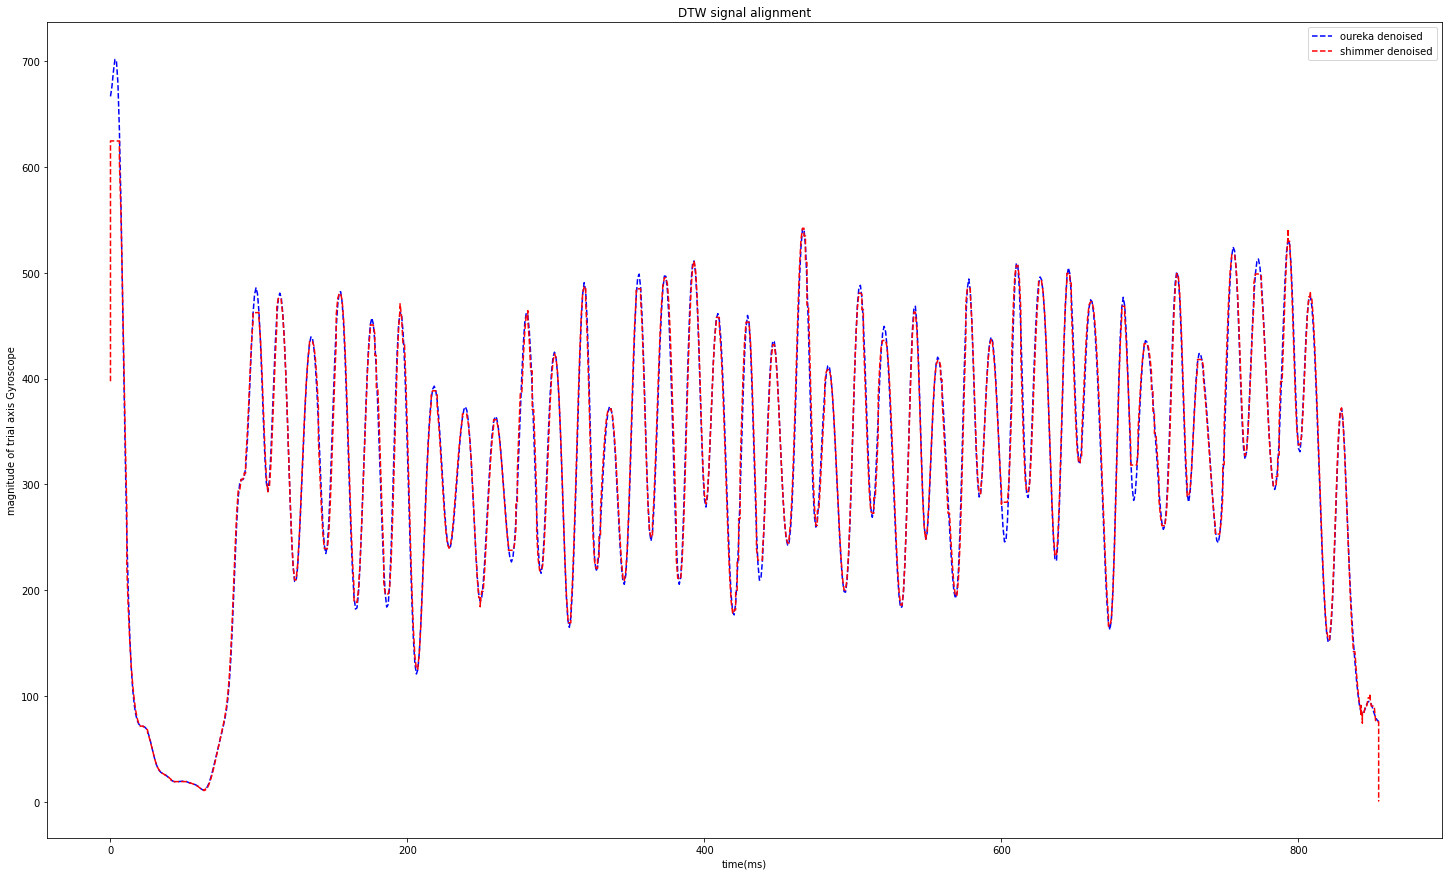

In [ ]:
from scipy.ndimage.measurements import label
# plot of the denoised data of the shimmer and oureka
# denoised_shimmer = denoise(gravity_less_norm_shimmer_dynamic_3, 3)
# denoised_oureka = denoise(gravity_less_norm_oureka_dynamic_3, 3)
plt.figure(figsize=(25,15))

# plt.plot(denoised_shimmer, 'r', linestyle='dashed',label='shimmer denoised') #black
# plt.plot(denoised_oureka,'b', linestyle='dashed',label='oureka denoised') #blue

plt.plot(denoised_oureka_dtw_gyro,'b', linestyle='dashed',label='oureka denoised')
plt.plot(alignment_gyro.index1,denoised_shimmer_dtw_ref_gyro[alignment_gyro.index2],'r', linestyle='dashed',label='shimmer denoised')

# ax1.set_xlabel('time(ms)')
# ax1.set_ylabel('Acceleration(m/s^2)')
plt.xlabel('time(ms)')
plt.ylabel('magnitude of trial axis Gyroscope')
plt.title('DTW signal alignment')
plt.legend()

<ipython-input-61-43beecbabdb3>:1: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label


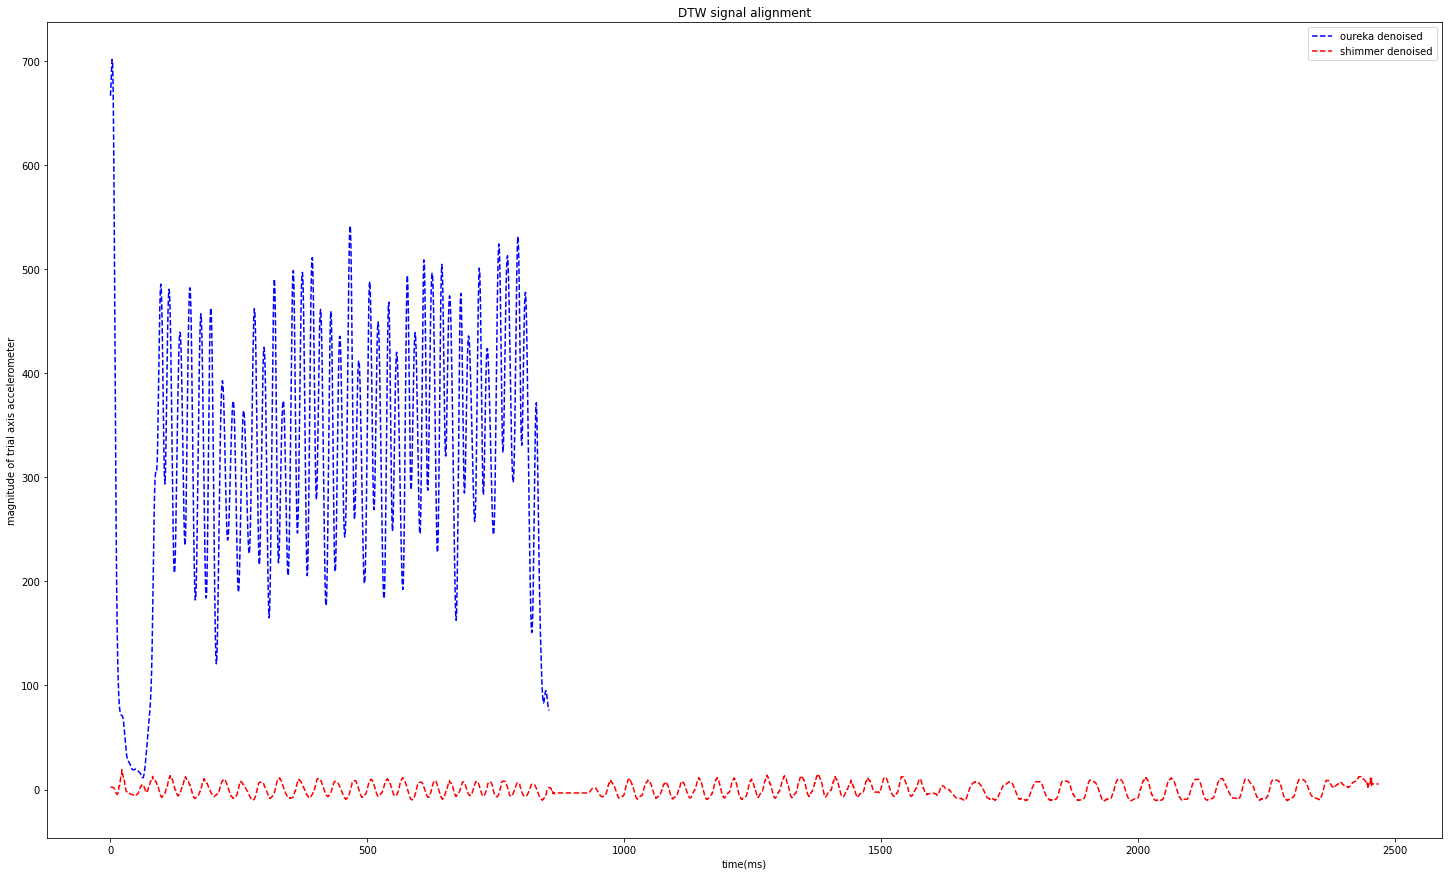

In [ ]:
from scipy.ndimage.measurements import label
# plot of the denoised data of the shimmer and oureka
# denoised_shimmer = denoise(gravity_less_norm_shimmer_dynamic_3, 3)
# denoised_oureka = denoise(gravity_less_norm_oureka_dynamic_3, 3)
plt.figure(figsize=(25,15))

# plt.plot(denoised_shimmer, 'r', linestyle='dashed',label='shimmer denoised') #black
# plt.plot(denoised_oureka,'b', linestyle='dashed',label='oureka denoised') #blue

plt.plot(denoised_oureka_dtw_gyro,'b', linestyle='dashed',label='oureka denoised')
plt.plot(alignment.index1,denoised_shimmer_dtw_ref[alignment.index2],'r', linestyle='dashed',label='shimmer denoised')

# ax1.set_xlabel('time(ms)')
# ax1.set_ylabel('Acceleration(m/s^2)')
plt.xlabel('time(ms)')
plt.ylabel('magnitude of trial axis accelerometer')
plt.title('DTW signal alignment')
plt.legend()

In [ ]:
len(denoised_oureka_dtw)
# len(alignment.index1)

2470

#### Denoising the magnitude

<ipython-input-63-b792b74e1509>:1: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label


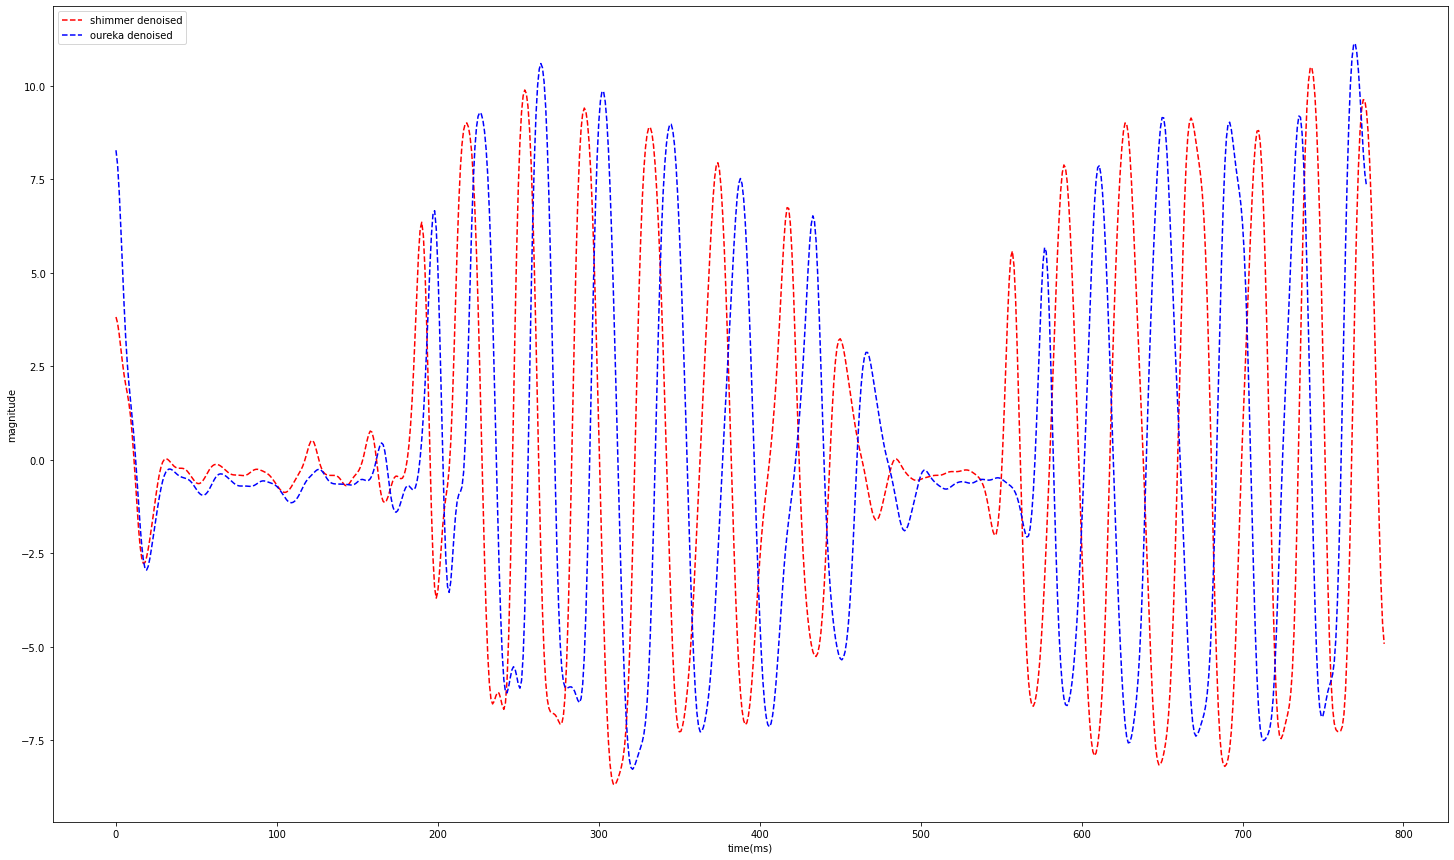

In [ ]:
from scipy.ndimage.measurements import label
# plot of the denoised data of the shimmer and oureka
denoised_shimmer_1 = denoise(gravity_less_norm_shimmer_dynamic_1[10:], 3)
denoised_oureka_1 = denoise(gravity_less_norm_oureka_dynamic_1, 3)
plt.figure(figsize=(25,15))

plt.plot(denoised_shimmer_1, 'r', linestyle='dashed',label='shimmer denoised') #black
plt.plot(denoised_oureka_1,'b', linestyle='dashed',label='oureka denoised') #blue


# ax1.set_xlabel('time(ms)')
# ax1.set_ylabel('Acceleration(m/s^2)')
plt.xlabel('time(ms)')
plt.ylabel('magnitude')
plt.legend()

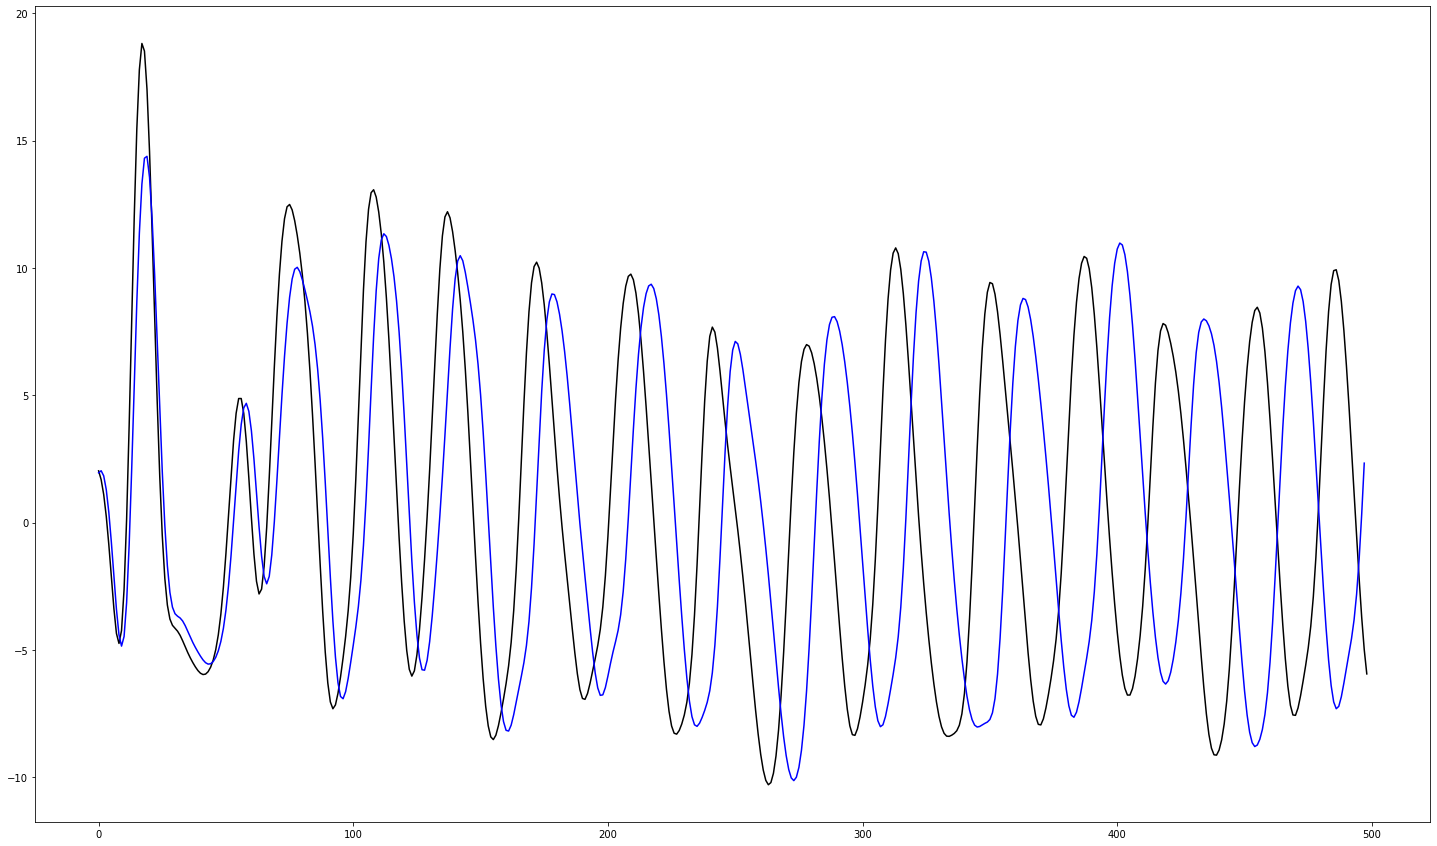

In [ ]:
plt.figure(figsize=(25,15))

plt.plot(denoised_shimmer[1:500], 'k', label='denoised data') #black
plt.plot(denoised_oureka[4:502],'b', label='denoised data') #blue

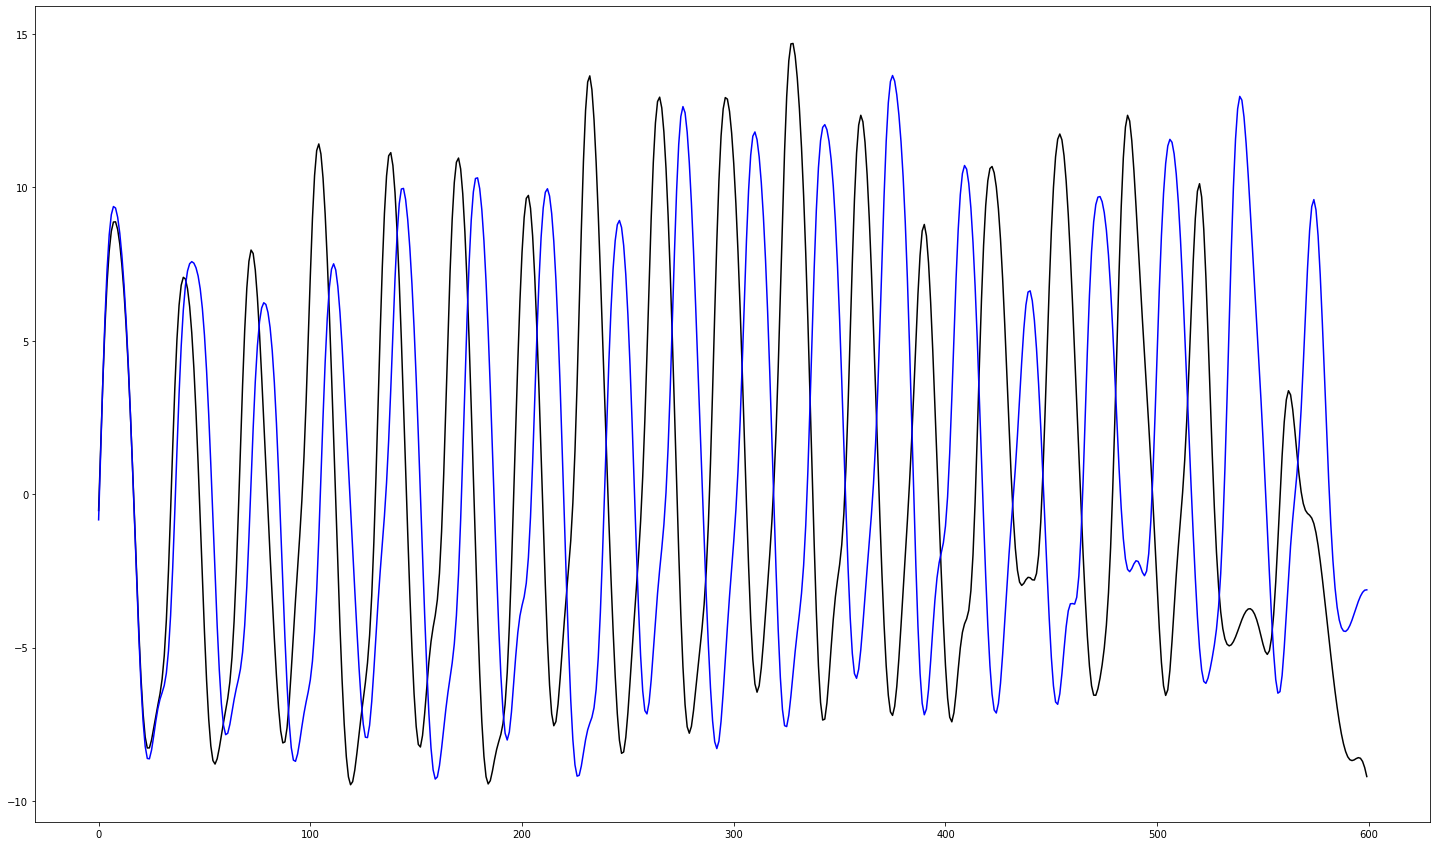

In [ ]:
plt.figure(figsize=(25,15))
plt.plot(denoised_shimmer[1000:1600], 'k', label='denoised data') #black
plt.plot(denoised_oureka[1002:1602],'b', label='denoised data') #blue

#### Plots of the denoised signal showing the synchronised interval

Text(0, 0.5, 'Acceleration(m/s^2)')

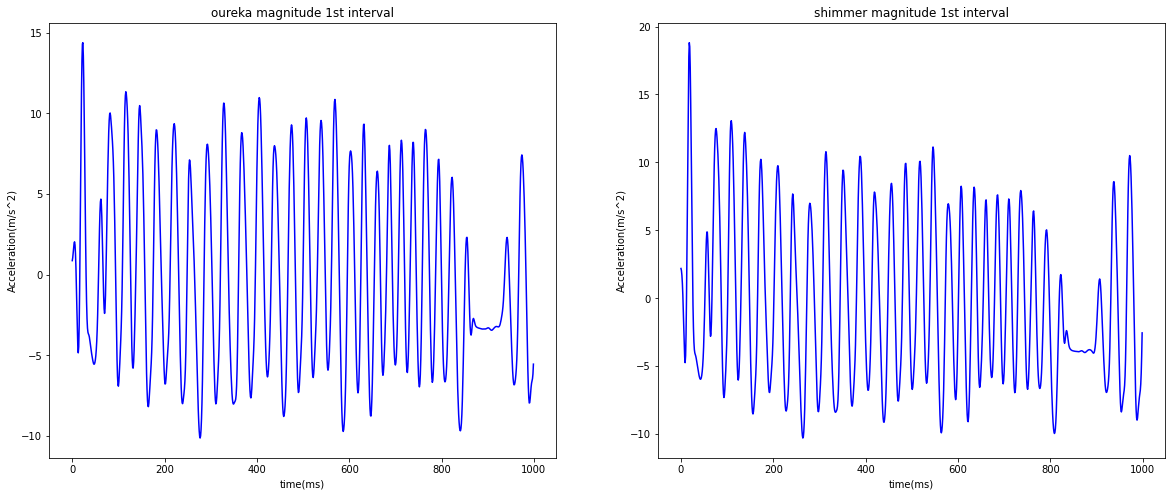

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
ax1.set_title('oureka magnitude 1st interval')

ax1.plot(denoised_oureka[:1000],'b')
ax2.set_title('shimmer magnitude 1st interval')

ax2.plot(denoised_shimmer[:1000],'b')

ax1.set_xlabel('time(ms)')
ax1.set_ylabel('Acceleration(m/s^2)')
ax2.set_xlabel('time(ms)')
ax2.set_ylabel('Acceleration(m/s^2)')

In [ ]:
shimmer_interval = []
for i,j in zip(range(1,2470,494),range(494,2470,494)):
  # print(i,j)
  shimmer_interval.append(np.trapz(abs(denoised_shimmer[i:j])))

In [ ]:
oureka_interval = []

for i,j in zip(range(1,2470,494),range(494,2470,494)):
  # print(i,j)
  oureka_interval.append(np.trapz(abs(denoised_oureka[i:j])))

In [ ]:
subtracted = [element1 - element2 for (element1, element2) in zip(shimmer_interval, oureka_interval)]
print(sum(subtracted))


546.8711282985405


In [ ]:
print(sum(subtracted))

546.8711282985405


In [ ]:
len(denoised_shimmer_1)

789

In [ ]:
shimmer_interval = []
for i,j in zip(range(1,789,390),range(390,789,390)):
  print(i,j)
  shimmer_interval.append(np.trapz(abs(denoised_shimmer_1[i:j])))

1 390
391 780


In [ ]:
shimmer_interval

[1200.7542019384905, 1535.0923395956943]

In [ ]:
oureka_interval = []

for i,j in zip(range(1,778,380),range(380,778,380)):
  # print(i,j)
  oureka_interval.append(np.trapz(abs(denoised_oureka_1[i:j])))

In [ ]:
oureka_interval

[1167.2581828079178, 1396.8196765937594]

In [ ]:
subtracted = [element1 - element2 for (element1, element2) in zip(shimmer_interval, oureka_interval)]
print(sum(subtracted))


171.7686821325076


In [ ]:
print(subtracted)

[33.49601913057268, 138.27266300193492]


## Dynamic time warping (area under the curve)

In [ ]:
shimmer_interval = []
for i,j in zip(range(1,1043,450),range(450,1043,450)):
  print(i,j)
  shimmer_interval.append(np.trapz(abs(denoised_shimmer_dtw_ref[alignment.index2[i:j]]),dx=0.01))

1 450
451 900


In [ ]:
oureka_interval = []

for i,j in zip(range(1,1043,450),range(450,1043,450)):
  print(i,j)
  oureka_interval.append(np.trapz(abs(denoised_oureka_dtw[alignment.index1[i:j]]),dx=0.01))

1 450
451 900


In [ ]:
subtracted = [element1 - element2 for (element1, element2) in zip(shimmer_interval, oureka_interval)]
print(sum(subtracted))

0.5636920500157814


In [ ]:
shimmer_interval_gyro = []
for i,j in zip(range(200,900,174),range(374,900,174)):
  print(i,j)
  shimmer_interval_gyro.append(np.trapz(abs(denoised_shimmer_dtw_ref_gyro[alignment_gyro.index2[i:j]]),dx=0.01))

200 374
374 548
548 722
722 896


In [ ]:
oureka_interval_gyro = []

for i,j in zip(range(200,900,174),range(374,900,174)):
  print(i,j)
  oureka_interval_gyro.append(np.trapz(abs(denoised_oureka_dtw_gyro[alignment_gyro.index1[i:j]]),dx=0.01))

200 374
374 548
548 722
722 896


In [ ]:
subtracted_gyro = [element1 - element2 for (element1, element2) in zip(shimmer_interval_gyro, oureka_interval_gyro)]
print(sum(subtracted_gyro))

4.498514273768592


In [ ]:
subtracted_gyro

[-0.10368437251895557,
 2.452130994303616,
 -0.24013318133813755,
 2.3902008333220692]

In [ ]:
def plot_and_make_diff(signal1, signal2, idx1, idx2):

  index_gyro_1 = alignment_gyro.index1[idx1:idx2]
  index_gyro_2 = alignment_gyro.index2[idx1:idx2]

  plt.plot(signal1[index_gyro_1])
  plt.plot(signal2[index_gyro_2])

  print(np.trapz(abs(signal1[index_gyro_1]),dx=0.01))
  print(np.trapz(abs(signal2[index_gyro_2]),dx=0.01))
  print(np.trapz(abs(signal1[index_gyro_1]),dx=0.01) - np.trapz(abs(signal2[index_gyro_2]),dx=0.01))

  plt.show()

533.286873931798
533.1831895592791
0.10368437251895557


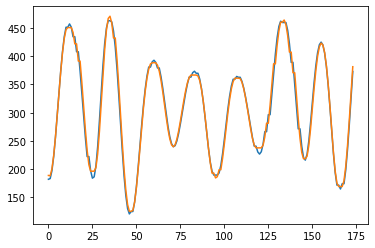

In [ ]:
plot_and_make_diff(denoised_oureka_dtw_gyro, denoised_shimmer_dtw_ref_gyro, 200, 374)

597.7954797474365
600.2476107417401
-2.452130994303616


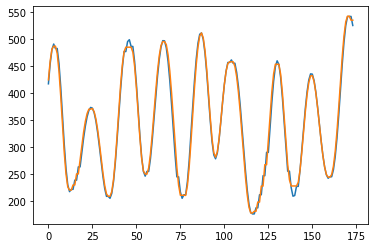

In [ ]:
plot_and_make_diff(denoised_oureka_dtw_gyro, denoised_shimmer_dtw_ref_gyro,374 ,548)

605.5804738849833
605.3403407036452
0.24013318133813755


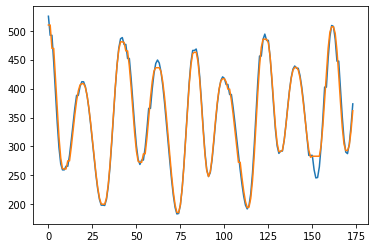

In [ ]:
plot_and_make_diff(denoised_oureka_dtw_gyro, denoised_shimmer_dtw_ref_gyro,548 ,722)

640.9713639738609
643.361564807183
-2.3902008333220692


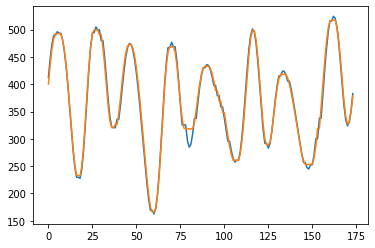

In [ ]:
plot_and_make_diff(denoised_oureka_dtw_gyro, denoised_shimmer_dtw_ref_gyro,722, 896)

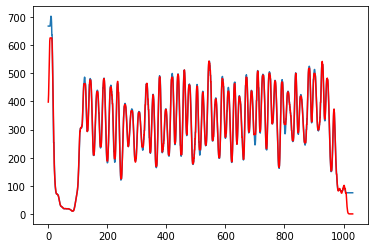

In [ ]:
plt.plot(denoised_oureka_dtw_gyro[alignment_gyro.index1])

plt.plot(denoised_shimmer_dtw_ref_gyro[alignment_gyro.index2],'r')

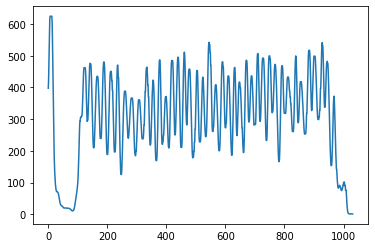

In [ ]:
plt.plot(denoised_shimmer_dtw_ref_gyro[alignment_gyro.index2])